In [1]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_rows=10

In [13]:
df=pd.read_csv("NBA_Stats_1950_2021_raw.csv")
df.head()

,Year,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
0,1950,Curly Armstrong,FTW,63.0,NaN,144.0,516.0,NaN,NaN,170.0,241.0,NaN,217.0,NaN,NaN,NaN,176.0,NaN,NaN,458.0
1,1950,Cliff Barker,INO,49.0,NaN,102.0,274.0,NaN,NaN,75.0,106.0,NaN,99.0,NaN,NaN,NaN,109.0,NaN,NaN,279.0
2,1950,Leo Barnhorst,CHS,67.0,NaN,174.0,499.0,NaN,NaN,90.0,129.0,NaN,192.0,NaN,NaN,NaN,140.0,NaN,NaN,438.0
3,1950,Ed Bartels,TOT,15.0,NaN,22.0,86.0,NaN,NaN,19.0,34.0,NaN,29.0,NaN,NaN,NaN,20.0,NaN,NaN,63.0
4,1950,Ed Bartels,DNN,13.0,NaN,21.0,82.0,NaN,NaN,17.0,31.0,NaN,27.0,NaN,NaN,NaN,20.0,NaN,NaN,59.0


In [14]:
#replace NaN values with 0 so we can do math with them
df['GP'] = df['GP'].fillna(0)
df['PTS'] = df['PTS'].fillna(0)
df['FTA'] = df['FTA'].fillna(0)
df['FTM'] = df['FTM'].fillna(0)
df['MIN'] = df['MIN'].fillna(0)
df['PTS']=df['PTS'].fillna(0)

In [16]:
#drop columns we aren't using
df=df.drop(['Team','FGM', 'FGA', '3PM', '3PA', 'FTA',
       'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK'], axis=1)

In [17]:
df.head()

,Year,Player,GP,MIN,FTM,PTS
0,1950,Curly Armstrong,63.0,0.0,170.0,458.0
1,1950,Cliff Barker,49.0,0.0,75.0,279.0
2,1950,Leo Barnhorst,67.0,0.0,90.0,438.0
3,1950,Ed Bartels,15.0,0.0,19.0,63.0
4,1950,Ed Bartels,13.0,0.0,17.0,59.0


In [18]:
#free throws are worth 1 point
#a percentage of how many total points come from free throws can be calculated by (FTM/PTS)*100

In [19]:
df['FT%']=(df['FTM'].div(df.PTS))*100

In [20]:
df.head()

,Year,Player,GP,MIN,FTM,PTS,FT%
0,1950,Curly Armstrong,63.0,0.0,170.0,458.0,37.117904
1,1950,Cliff Barker,49.0,0.0,75.0,279.0,26.881720
2,1950,Leo Barnhorst,67.0,0.0,90.0,438.0,20.547945
3,1950,Ed Bartels,15.0,0.0,19.0,63.0,30.158730
4,1950,Ed Bartels,13.0,0.0,17.0,59.0,28.813559


In [21]:
#I will isolate 10 players to work with
#I will choose the median 10 (when arrranged by points score)
PlayersPerformance=df.groupby('Player')['PTS'].agg(['mean'])

In [23]:
#Calculate how many rows there are
PlayersPerformance.shape

(4279, 1)

In [33]:
#sort by avg PTS score
PlayersPerformance=PlayersPerformance.sort_values('mean', ascending=False)

In [34]:
PlayersPerformance.iloc[[2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143]]

,mean
Player,
Mel Davis,234.666667
Leon Powe,234.571429
Chuck Gilmur,234.500000
Shawne Williams,234.444444
Chucky Brown,234.047619
Andre Roberson,233.600000
Ime Udoka,233.571429
Mitchell Butler,233.500000
Shannon Brown,233.133333


In [35]:
#create the variables
MelDavis=(df[df['Player'] == 'Mel Davis'])
LeonPowe=(df[df['Player'] == 'Leon Powe'])
ChuckGilmur=(df[df['Player'] == 'Chuck Gilmur'])
ShawneWilliams=(df[df['Player'] == 'Shawne Williams'])
ChuckyBrown=(df[df['Player'] == 'Chucky Brown'])
AndreRoberson=(df[df['Player'] == 'Andre Roberson'])
ImeUdoka=(df[df['Player'] == 'Ime Udoka'])
MitchellButler=(df[df['Player'] == 'Mitchell Butler'])
ShannonBrown=(df[df['Player'] == 'Shannon Brown'])
DeQuanJones=(df[df['Player'] == 'DeQuan Jones'])

In [37]:
#I would like to plot the above charts into one chart so it's easy to compare them
MedianPlayersdf=pd.concat([MelDavis, LeonPowe, ChuckGilmur, ShawneWilliams, 
                           ChuckyBrown, AndreRoberson, ImeUdoka, MitchellButler, 
                           ShannonBrown, DeQuanJones], axis=0)
MedianPlayersdf

,Year,Player,GP,MIN,FTM,PTS,FT%
3877,1974,Mel Davis,30.0,167.0,12.0,78.0,15.384615
4145,1975,Mel Davis,62.0,903.0,48.0,356.0,13.483146
4409,1976,Mel Davis,42.0,408.0,22.0,174.0,12.643678
4697,1977,Mel Davis,56.0,1094.0,64.0,400.0,16.000000
4698,1977,Mel Davis,22.0,342.0,22.0,104.0,21.153846
...,...,...,...,...,...,...,...
22281,2014,Shannon Brown,29.0,251.0,15.0,63.0,23.809524
22282,2014,Shannon Brown,10.0,103.0,7.0,23.0,30.434783
22283,2014,Shannon Brown,19.0,148.0,8.0,40.0,20.000000
22878,2015,Shannon Brown,5.0,89.0,3.0,20.0,15.000000


In [100]:
#finding out whether average PTS score or average of MIN played has a correlation to FT%

In [66]:
#Creating a dataframe that we can use to correlate
PTSMedianPlayers=MedianPlayersdf.groupby('Player')['PTS'].agg(['mean'])
PTSMedianPlayers=PTSMedianPlayers.rename(columns={"mean": "PTS Mean"})
MINMedianPlayers=MedianPlayersdf.groupby('Player')['MIN'].agg(['mean'])
MINMedianPlayers=MINMedianPlayers.rename(columns={"mean": "MINS Mean"})
FTMedianPlayers=MedianPlayersdf.groupby('Player')['FT%'].agg(['mean'])
FTMedianPlayers=FTMedianPlayers.rename(columns={"mean": "FT% Mean"})
PTSMIN=PTSMedianPlayers.merge(MINMedianPlayers, on='Player')
PTSMINFT=PTSMIN.merge(FTMedianPlayers, on='Player')
PTSMINFT

,PTS Mean,MINS Mean,FT% Mean
Player,,,
Andre Roberson,233.600000,1135.400000,10.976767
Chuck Gilmur,234.500000,0.000000,36.283892
Chucky Brown,234.047619,694.523810,18.639822
DeQuan Jones,233.000000,803.000000,14.592275
Ime Udoka,233.571429,815.857143,16.370159
Leon Powe,234.571429,521.142857,32.321673
Mel Davis,234.666667,611.000000,15.475746
Mitchell Butler,233.500000,683.000000,18.905244
Shannon Brown,233.133333,553.133333,17.785211


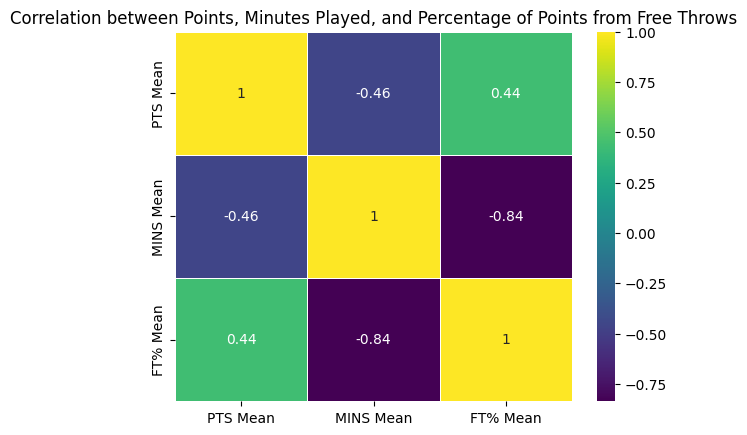

In [68]:
#calculate correlation between the percentage columns we created
MedianPlayersCorr=PTSMINFT.corr()
#create a heatmap of the correlation
plt.figure()
sns.heatmap(MedianPlayersCorr, annot=True, linewidth=0.5, cmap="viridis")
plt.title("Correlation between Points, Minutes Played, and Percentage of Points from Free Throws")
plt.show()

Text(0.5, 1.0, 'Free Throw Percentage by Total Points')

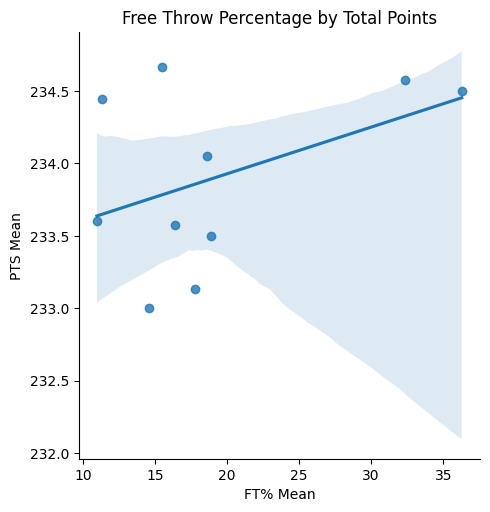

In [102]:
sns.lmplot(data=PTSMINFT, x="FT% Mean", y="PTS Mean")
plt.title("Free Throw Percentage by Total Points")

Text(0.5, 1.0, 'Total Points by Minutes Played')

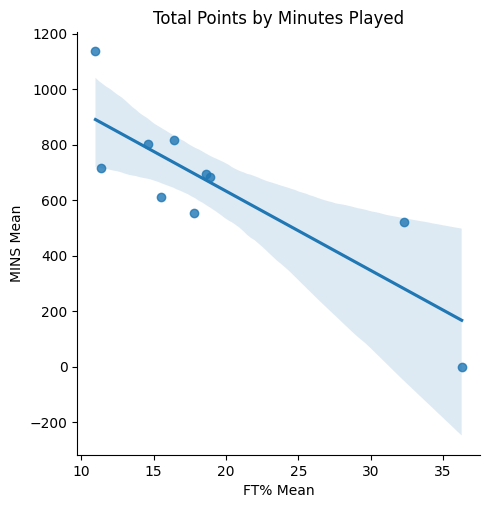

In [103]:
sns.lmplot(data=PTSMINFT, x="FT% Mean", y="MINS Mean")
plt.title("Total Points by Minutes Played")

In [104]:
#I also want the top players sorted by free throw percentage
#the client wants to know this information split between 1970-present (NBA merger) and 2000-present

In [41]:
#creating a dataframe of player data where year is greater than or equal to 1970
NBAMerge = df[df.Year >= 1970]
NBAMerge.head()

,Year,Player,GP,MIN,FTM,PTS,FT%
2847,1970,Zaid Abdul-Aziz,80.0,1637.0,119.0,593.0,20.067454
2848,1970,Kareem Abdul-Jabbar*,82.0,3534.0,485.0,2361.0,20.542143
2849,1970,Rick Adelman,35.0,717.0,68.0,260.0,26.153846
2850,1970,Lucius Allen,81.0,1817.0,182.0,794.0,22.921914
2851,1970,Wally Anderzunas,44.0,370.0,29.0,159.0,18.238994


In [90]:
#sort by avg PTS score and getting the top 5 players
NBAMergeAvg=NBAMerge.groupby('Player')['FTM'].agg(['mean'])
NBAMergePerformance=NBAMergeAvg.sort_values('mean', ascending=False)
NBAMergeTop5=NBAMergePerformance.nlargest(n=5, columns=['mean'])
NBAMergeTop5

,mean
Player,
Karl Malone*,515.105263
James Harden,489.428571
Michael Jordan,488.466667
Kevin Durant,457.846154
George Gervin*,454.100000


In [80]:
#create the variables
#added NBAMerge after variable name to differentiate it from the modern era players
KarlMaloneNBAMerge=(NBAMerge[NBAMerge['Player'] == 'Karl Malone*'])
JamesHardenNBAMerge=(NBAMerge[NBAMerge['Player'] == 'James Harden'])
MichaelJordanNBAMerge=(NBAMerge[NBAMerge['Player'] == 'Michael Jordan'])
KevinDurantNBAMerge=(NBAMerge[NBAMerge['Player'] == 'Kevin Durant'])
GeorgeGervinNBAMerge=(NBAMerge[NBAMerge['Player'] == 'George Gervin*'])

In [91]:
#plot the above into one dataframe so it's easy to compare them
NBAMergedf=pd.concat([KarlMaloneNBAMerge, JamesHardenNBAMerge, MichaelJordanNBAMerge, KevinDurantNBAMerge, GeorgeGervinNBAMerge], axis=0)
NBAMergedf

,Year,Player,GP,MIN,FTM,PTS,FT%
8086,1986,Karl Malone*,81.0,2475.0,195.0,1203.0,16.209476
8457,1987,Karl Malone*,82.0,2857.0,323.0,1779.0,18.156268
8856,1988,Karl Malone*,82.0,3198.0,552.0,2268.0,24.338624
9300,1989,Karl Malone*,80.0,3126.0,703.0,2326.0,30.223560
9755,1990,Karl Malone*,82.0,3122.0,696.0,2540.0,27.401575
...,...,...,...,...,...,...,...
6525,1982,George Gervin*,79.0,2817.0,555.0,2551.0,21.756174
6904,1983,George Gervin*,78.0,2830.0,517.0,2043.0,25.305923
7276,1984,George Gervin*,76.0,2584.0,427.0,1967.0,21.708185
7624,1985,George Gervin*,72.0,2091.0,324.0,1524.0,21.259843


Text(0.5, 1.0, 'Free Throw Percentage by Year')

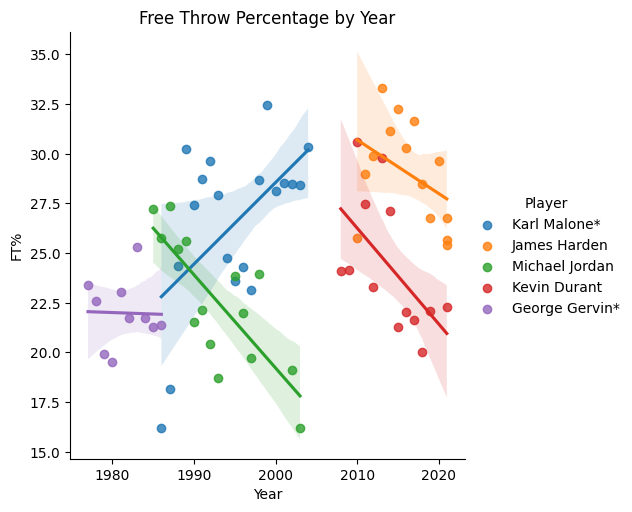

In [94]:
sns.lmplot(data=NBAMergedf, x="Year", y="FT%", hue="Player")
plt.title("Free Throw Percentage by Year")

C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Karl Malone Free Throws Made and Total Points')

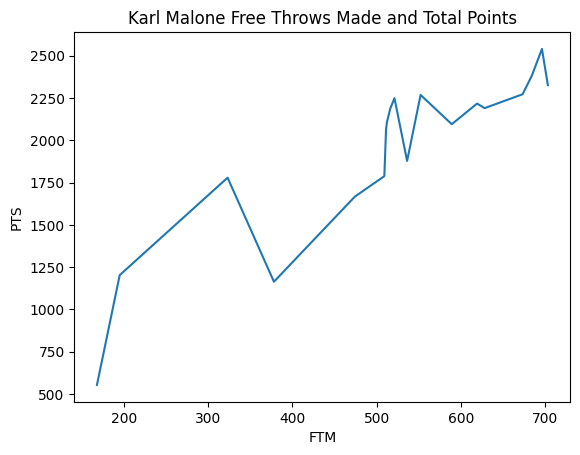

In [98]:
#Karl Malone has the highest percentage of total points from free throws since the NBA merger
#so I will create a line plot of his performance 
sns.lineplot(data=KarlMaloneNBAMerge, y="PTS", x="FTM")
plt.title("Karl Malone Free Throws Made and Total Points")

In [83]:
#creating a dataframe of player data where year is greater than or equal to 2000
ModernPlayers = df[df.Year >= 2000]
ModernPlayers.head()

,Year,Player,GP,MIN,FTM,PTS,FT%
14420,2000,Tariq Abdul-Wahad,61.0,1578.0,146.0,697.0,20.946915
14421,2000,Tariq Abdul-Wahad,46.0,1205.0,115.0,563.0,20.426288
14422,2000,Tariq Abdul-Wahad,15.0,373.0,31.0,134.0,23.134328
14423,2000,Shareef Abdur-Rahim,82.0,3223.0,446.0,1663.0,26.819002
14424,2000,Cory Alexander,29.0,329.0,17.0,82.0,20.731707


In [87]:
#sort by avg PTS score and getting the top 5 players
ModernPlayersAvg=ModernPlayers.groupby('Player')['FTM'].agg(['mean'])
ModernPlayersPerformance=ModernPlayersAvg.sort_values('mean', ascending=False)
ModernPlayersTop5=ModernPlayersPerformance.nlargest(n=5, columns=['mean'])
ModernPlayersTop5

,mean
Player,
James Harden,489.428571
Kevin Durant,457.846154
Karl Malone*,455.200000
Kobe Bryant,449.058824
Trae Young,436.000000


In [77]:
#create the variables - added Modern after the player name to differentiate from previous df, since some are repeated
JamesHardenModern=(ModernPlayers[ModernPlayers['Player'] == 'James Harden'])
KevinDurantModern=(ModernPlayers[ModernPlayers['Player'] == 'Kevin Durant'])
KarlMaloneModern=(ModernPlayers[ModernPlayers['Player'] == 'Karl Malone*'])
KobeBryantModern=(ModernPlayers[ModernPlayers['Player'] == 'Kobe Bryant'])
TraeYoungModern=(ModernPlayers[ModernPlayers['Player'] == 'Trae Young'])

In [88]:
#plot the above into one dataframe so it's easy to compare them
ModernPlayersdf=pd.concat([JamesHardenModern, KevinDurantModern, KarlMaloneModern, KobeBryantModern, TraeYoungModern], axis=0)
ModernPlayersdf

,Year,Player,GP,MIN,FTM,PTS,FT%
20073,2010,James Harden,76.0,1738.0,194.0,753.0,25.763612
20705,2011,James Harden,82.0,2189.0,289.0,998.0,28.957916
21276,2012,James Harden,62.0,1946.0,312.0,1044.0,29.885057
21823,2013,James Harden,78.0,2985.0,674.0,2023.0,33.316856
22440,2014,James Harden,73.0,2777.0,576.0,1851.0,31.118314
...,...,...,...,...,...,...,...
22879,2015,Kobe Bryant,35.0,1207.0,196.0,782.0,25.063939
23520,2016,Kobe Bryant,66.0,1863.0,232.0,1161.0,19.982773
24926,2019,Trae Young,81.0,2503.3,343.0,1549.0,22.143318
25196,2020,Trae Young,60.0,2120.1,481.0,1778.0,27.052868


Text(0.5, 1.0, 'Free Throw Percentage by Year')

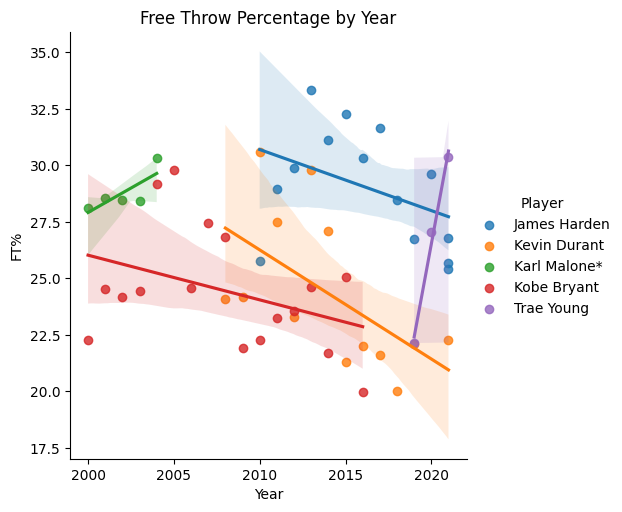

In [89]:
sns.lmplot(data=ModernPlayersdf, x="Year", y="FT%", hue="Player")
plt.title("Free Throw Percentage by Year")

C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'James Harden Free Throws Made and Total Points')

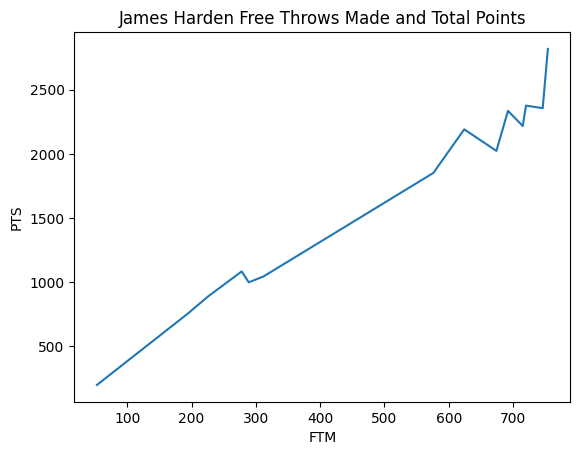

In [99]:
#James Harden has the highest percentage of total points from free throws since the NBA merger
#so I will create a line plot of his performance 
sns.lineplot(data=JamesHardenModern, y="PTS", x="FTM")
plt.title("James Harden Free Throws Made and Total Points")